# Poisson Rate Coding using Pytorch

In [7]:
# Computation
import torch

# Dataset
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms

# Visualization
import matplotlib
import matplotlib.pyplot as plt

# Matplotlib params
%matplotlib inline
matplotlib.rcParams['axes.grid'] = False

# Fixing seed
torch.manual_seed(42)

## Data Prepration

In [8]:
batch_size_train = 64

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

testset = CIFAR10('.pytorch/CIFAR10', train=False, transform=transform_test, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_train, shuffle=False, num_workers=2)

Files already downloaded and verified


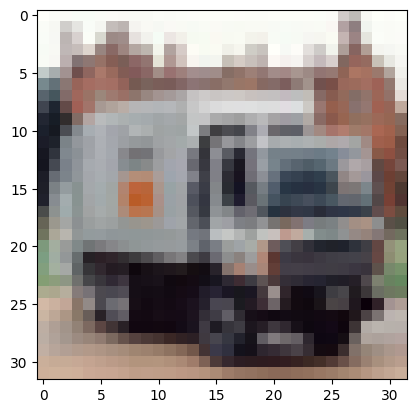

In [9]:
image_batch, labels_batch = next(iter(testloader))

image = image_batch[11]

# Normalizing the image
image = (image - image.min())/(image.max()-image.min())
plt.imshow(image.permute([1, 2, 0]))
plt.show()

## Rate Coding

### Creating Sample

In [10]:
time_steps = 100

# Repeating by the number of time_steps
raw_vector = torch.cat([
    torch.ones(1, 3, 32, 32),
    image.repeat(time_steps, 1, 1, 1)
])

### Encoding

In [11]:
rate_coded_vector = torch.poisson(raw_vector)

### Visualizing rate-coded sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


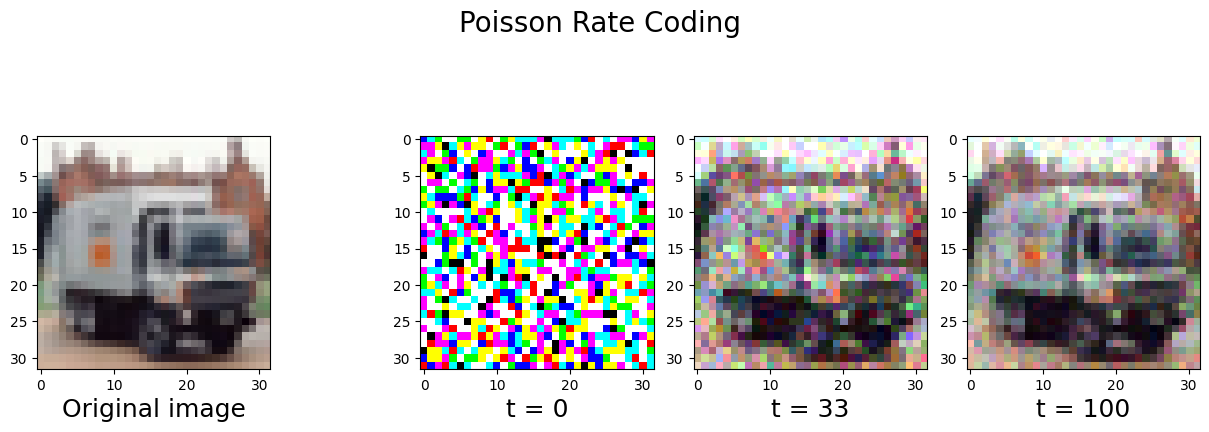

In [12]:
fig, ax = plt.subplot_mosaic(
    """
    A.BCD
    """,
    figsize=(15, 5),
    gridspec_kw={'width_ratios':[1,0.3,1,1,1]}
)
fig.suptitle('Poisson Rate Coding', fontsize=20)

ax['A'].imshow(image.permute([1, 2, 0]))
ax['A'].set_xlabel('Original image', fontsize=18)

ax['B'].imshow(rate_coded_vector[0].permute([1, 2, 0]))
ax['B'].set_xlabel('t = 0', fontsize=18)

ax['C'].imshow(rate_coded_vector[:time_steps//3].mean(0).permute([1, 2, 0]))
ax['C'].set_xlabel(f't = {time_steps//3}', fontsize=18)

ax['D'].imshow(rate_coded_vector.mean(0).permute([1, 2, 0]))
ax['D'].grid(None)
ax['D'].set_xlabel(f't = {time_steps}', fontsize=18)

plt.grid(None)
plt.show()